In [1]:
from diffusers import StableDiffusionInpaintPipeline

In [2]:
model = StableDiffusionInpaintPipeline.from_pretrained('CompVis/stable-diffusion-v1-4')

/home/vscode/.pyenv/versions/3.11.6/lib/python3.11/site-packages/diffusers/pipelines/pipeline_utils.py:1007: FutureWarning: You are using a legacy checkpoint for inpainting with Stable Diffusion, therefore we are loading the <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint_legacy.StableDiffusionInpaintPipelineLegacy'> class instead of <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint.StableDiffusionInpaintPipeline'>. For better inpainting results, we strongly suggest using Stable Diffusion's official inpainting checkpoint: https://huggingface.co/runwayml/stable-diffusion-inpainting instead or adapting your checkpoint CompVis/stable-diffusion-v1-4 to the format of https://huggingface.co/runwayml/stable-diffusion-inpainting. Note that we do not actively maintain the {StableDiffusionInpaintPipelineLegacy} class and will likely remove it in version 1.0.0.
  deprecate("StableDiffusionInpaintPipelineLegacy", "1.0.0", deprecation_mess

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
/home/vscode/.pyenv/versions/3.11.6/lib/python3.11/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_inpaint_legacy.py:140: FutureWarning: The class <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint_legacy.StableDiffusionInpaintPipelineLegacy'> is deprecated and will be removed in v1.0.0. You can achieve exactly the same functionalityby loading your model into `StableDiffusionInpaintPipeline` instead. See https://github.com/huggingface/diffusers/pull/3533for more information.
  deprecate("legacy is outdated", "1.0.0", d

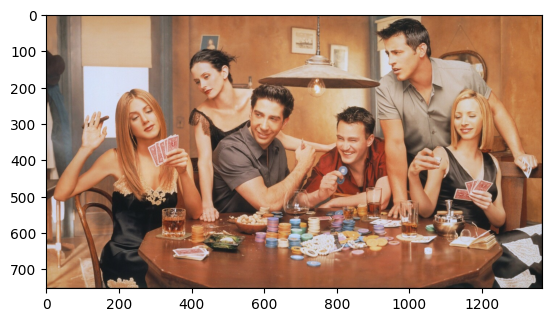

In [3]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open('assets/friends.jpeg')
plt.imshow(image)

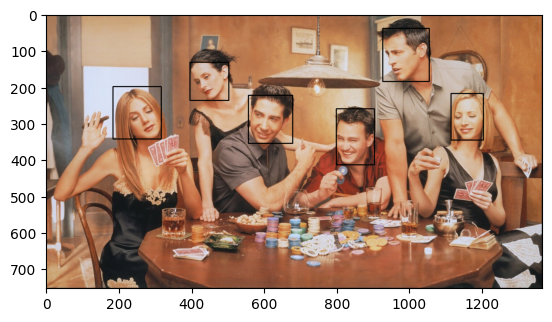

In [4]:
import numpy as np
import cv2

bboxes = np.array([
    [184,199, 317,343],
    [396,132, 503,237],
    [557,223, 679,355],
    [799,260, 904,414],
    [927,39, 1055,185],
    [1115,218, 1204,346],
], dtype=np.uint16)

draw_image = np.asarray(image)
for bbox in bboxes:
    # draw rectangle
    x1,y1,x2,y2 = bbox
    cv2.rectangle(draw_image, (x1,y1), (x2,y2), (0,0,0), 2)

plt.imshow(draw_image)

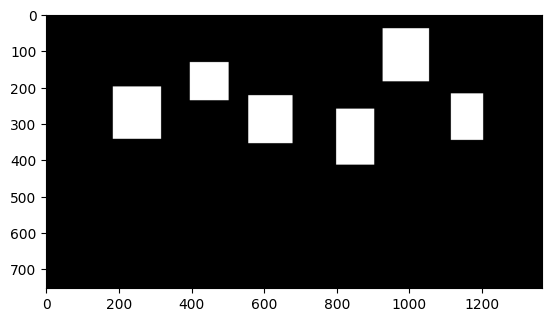

In [5]:
# make a mask: black for keep, white for replace (inside bboxes)
mask = np.zeros_like(draw_image)
for bbox in bboxes:
    x1,y1,x2,y2 = bbox
    mask[y1:y2,x1:x2] = 255

plt.imshow(mask)

In [18]:
import torch

PROMPT = 'Replace the faces of the people in the image with the faces of random people.'
STRENGTH = 1
NUM_INFERENCE_STEPS = 25

# orig_image = np.expand_dims(np.asarray(image), 0)

image_pil = image.convert('RGB')
mask_pil = Image.fromarray(mask).convert('RGB')


with torch.no_grad():
    with torch.autocast('cuda'):
        inpainted_image = model(
            prompt=PROMPT,
            image=image_pil,
            mask_image=mask_pil,
            strength=STRENGTH,
            num_inference_steps=NUM_INFERENCE_STEPS,
        )
    # fig, ax = plt.subplots()
    # ax.imshow(image)
    # fig.set_size_inches([10, 10])
    # ax.axis('off')
    # plt.show()
    # plt.clf()

    # del image

/home/vscode/.pyenv/versions/3.11.6/lib/python3.11/site-packages/torch/amp/autocast_mode.py:250: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn(


  0%|          | 0/25 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [9]:
final_image = inpainted_image.images[0]

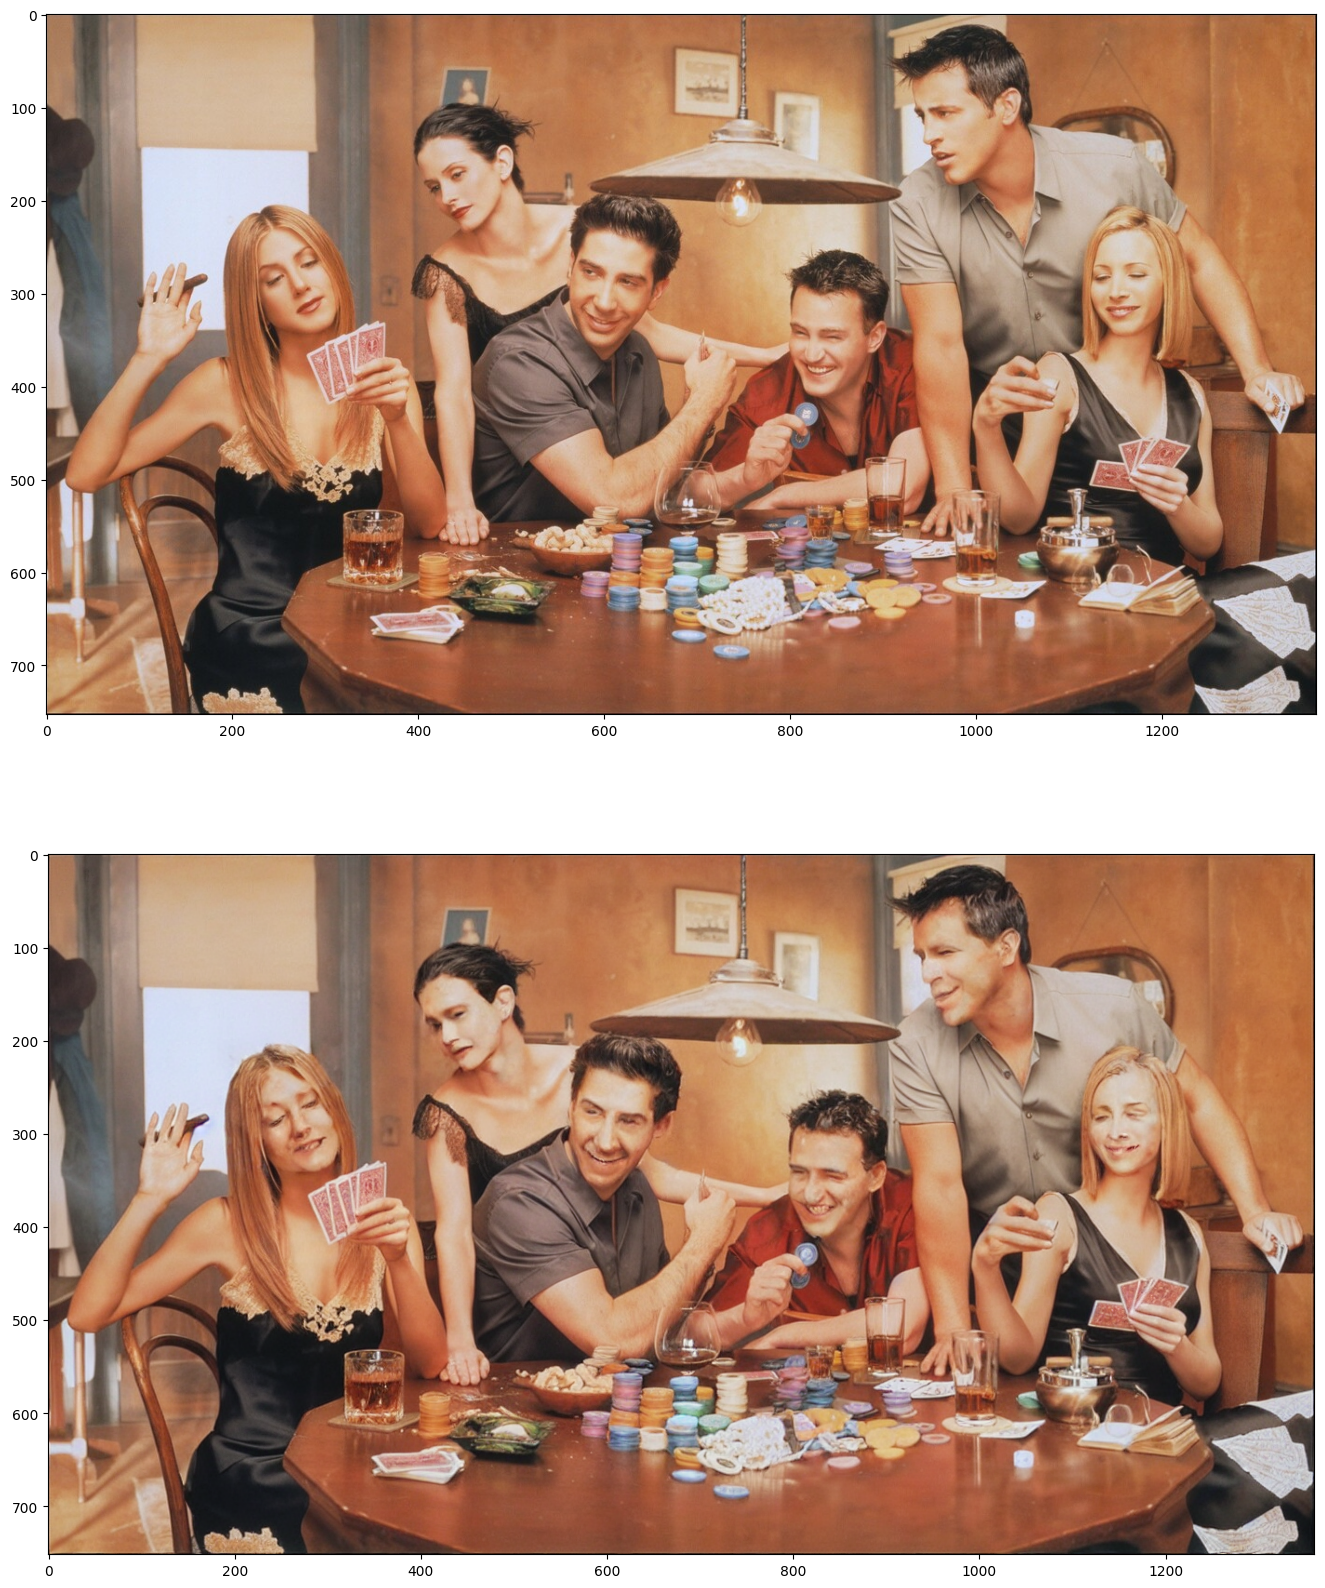

In [17]:
# compare with original

fig, ax = plt.subplots(2,1, figsize=(20,20))
ax[0].imshow(image)
ax[1].imshow(final_image)
plt.savefig('assets/friends-compare.jpeg')
